In [31]:
# on appelle les libraires
import numpy as np 
import pandas as pd 
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir("C:/Users/flora_000/Desktop/ENSAE/Projet Python/Data")
os.getcwd()

'C:\\Users\\flora_000\\Desktop\\ENSAE\\Projet Python\\Data'

In [6]:
# on importe la base de donnée finale
data0= pd.read_csv('data_2000_20_12_17.csv',delimiter=',',low_memory=False)
# on filtre sur le cancer des poumons 
data_c34 = data0[data0['Cancer_code'] == "C33,C34"]
# export du dataframe pour ne pas devoir réimporter la base avec tous les cancers à chaque fois
data_c34.to_csv('data.csv')

In [2]:
# on importe la base de donnée finale
data= pd.read_csv('data.csv',delimiter=',',low_memory=False)
data.describe()
print(data.shape)
data.head()

(37264, 58)


,Unnamed: 0,Unnamed: 0.1,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,14648,42136,"C33,C34",1,2,Antigua and Barbuda,2000,0,Antigua and Barbuda,2,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
1,14663,42151,"C33,C34",1,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
2,14679,42167,"C33,C34",2,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
3,14694,42182,"C33,C34",1,1,Antigua and Barbuda,2000,0,Antigua and Barbuda,1,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
4,14708,42196,"C33,C34",1,6,Antigua and Barbuda,2000,0,Antigua and Barbuda,6,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065


#  Méthode Bagging : ici, nous allons voir l'algorithme de forêt aléatoire pour une classification et pour une régression.

# Forêts alétoires Régression 

L’algorithme d’agrégation de modèles le plus utilisé est celui des forêts aléatoires (bagging), ce qui ne signifie 
pas qu’il conduit toujours à la meilleure prévision. L'objectif de la forêt aléatoire est de réduire le rique de sur-apprentissage (en comparaison de l'arbre de décision).

Plus que le nombre d’arbres n_estimators, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud : max_features. Par défaut, il prend la valeur p/3 en pour la régression et √p pour la classification. 

In [12]:
#variable à expliquer : taux de mortalité 
Y = data['Mortality_rate']
print(Y.describe())

#variables explicatives quantitatives
indicators = ['SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']          

#variables explicatives catégorielles : sex, tranche d'age, pays
data["Country_code"] = data["Country"].astype('category').cat.codes
data["Sex"] = data["Sex"].astype('category')
data["Age_bucket"] = data["Age_bucket"].astype('category')

# Normalisation des variables explicatives
X = data[indicators + ['Sex', 'Age_bucket', 'Year', 'Country_code']]
from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# on constitut nos deux échantillons "train" et "test"
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled , Y, random_state = 0, test_size=0.3)

count    37264.000000
mean        50.884518
std        132.585822
min          0.000000
25%          0.000000
50%          1.260432
75%         32.844219
max       1428.571429
Name: Mortality_rate, dtype: float64


Nous allons calculer le RMSE du modèle en faisant varier les paramètres suivants :
- n_estimators :  Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

n_estimators 1 erreur 103.832866542 103.746370993
n_estimators 2 erreur 103.832508737 103.696353557
n_estimators 3 erreur 103.83468095 103.692825133
n_estimators 4 erreur 103.828182572 103.717506267
n_estimators 5 erreur 103.84082215 103.770817244
n_estimators 6 erreur 103.828167039 103.716882043
n_estimators 7 erreur 103.831307918 103.698316811
n_estimators 8 erreur 103.82844305 103.722374551
n_estimators 9 erreur 103.830159912 103.734709345
n_estimators 10 erreur 103.82852474 103.708893007
n_estimators 11 erreur 103.828301777 103.719372112
n_estimators 12 erreur 103.828185492 103.718688781
n_estimators 13 erreur 103.828149007 103.717440208
n_estimators 14 erreur 103.829511547 103.731225255
n_estimators 15 erreur 103.828478312 103.710318158
n_estimators 16 erreur 103.828243337 103.713936856
n_estimators 17 erreur 103.828988396 103.705887378
n_estimators 18 erreur 103.833405137 103.694342358
n_estimators 19 erreur 103.828328242 103.711815523


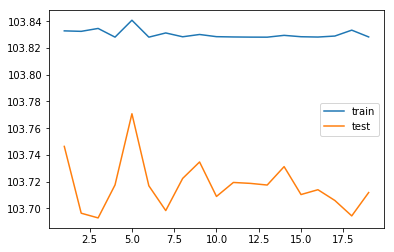

In [15]:
# on fait varier le nombre d'arbre dans la forêt.
curves = []
for n_estimators in range(1,20) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=n_estimators,max_depth=1)
    # apprentissage
    clf = clf.fit(X_train, Y_train)
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("n_estimators",n_estimators, "erreur", err_train, err_test)
    curves.append((n_estimators,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# Le modèle ne varie pas en fonction de ce paramètre, on choisit de garder la valeur par défaut n_estimators = 10

max_depth 1 erreur 103.829387006 103.730432987
max_depth 2 erreur 85.2323307097 83.599944892
max_depth 3 erreur 65.1095152473 64.7668684495
max_depth 4 erreur 54.0617305349 55.1929823881
max_depth 5 erreur 45.2319311669 47.4296591468
max_depth 6 erreur 37.1546476932 42.5160284259
max_depth 7 erreur 30.7878924891 37.1139782472
max_depth 8 erreur 26.1575008528 33.0534925608
max_depth 9 erreur 21.7069661892 32.6147030752
max_depth 10 erreur 18.9629911981 30.9894227641
max_depth 11 erreur 16.4100418091 30.228895479
max_depth 12 erreur 14.4227279684 31.0630353709
max_depth 13 erreur 13.9997391864 29.3880677113
max_depth 14 erreur 13.7828151046 29.6314005819
max_depth 15 erreur 13.7474249636 30.3613765661
max_depth 16 erreur 13.2122632347 30.0142865824
max_depth 17 erreur 13.3349478077 30.3078488724
max_depth 18 erreur 12.3942592804 30.6745796113
max_depth 19 erreur 12.7368322177 30.7487908392
max_depth 20 erreur 12.5108656042 30.0970093757
max_depth 21 erreur 12.8672360034 30.4683356525
max

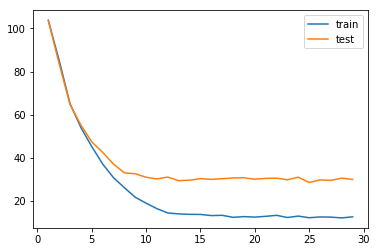

In [17]:
%%time
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,30) :
  
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=max_depth)
    # apprentissage
    clf = clf.fit(X_train, Y_train)
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_depth",max_depth, "erreur", err_train, err_test)
    curves.append((max_depth,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on choisit max_depth = 13

max_features 1 erreur 94.0604149145 112.243249693
max_features 2 erreur 67.5091051479 84.3195952087
max_features 3 erreur 51.4581595404 72.3625036788
max_features 4 erreur 55.4878994165 77.5763449696
max_features 5 erreur 47.45620569 61.811816881
max_features 6 erreur 48.7991858554 67.6616958703
max_features 7 erreur 39.9256073943 54.587559119
max_features 8 erreur 32.6944373687 47.4730194917
max_features 9 erreur 30.3000385555 47.074986095
max_features 10 erreur 25.423099835 39.8903215312
max_features 11 erreur 21.463295535 37.061687114
max_features 12 erreur 23.4088644529 38.2412892912
max_features 13 erreur 19.2355921321 32.9410292494
max_features 14 erreur 18.7375620796 33.7032778484
max_features 15 erreur 18.4162672562 33.7631625878
max_features 16 erreur 16.546827467 31.1604488402
max_features 17 erreur 17.271966827 32.6938012218
max_features 18 erreur 15.9386961852 31.0213632011
max_features 19 erreur 14.8022563556 30.2089661347
max_features 20 erreur 15.3144588951 29.5537903348

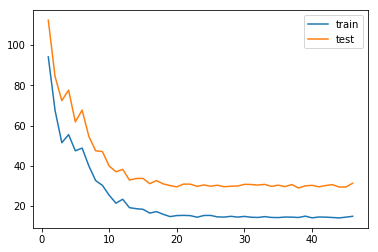

In [21]:
%%time
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(1,47) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=13,max_features=max_features)
    # apprentissage
    clf = clf.fit(X_train, Y_train)
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_features",max_features, "erreur", err_train, err_test)
    curves.append((max_features, err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde max_features = 20

In [33]:
%%time
# le modèle final est le suivant :
RF = RandomForestRegressor(n_estimators=10,max_depth=13,max_features=20)
RF = RF.fit(X_train, Y_train)
# prédiction
Y_pred_train = RF.predict(X_train)
Y_pred_test  = RF.predict(X_test)
# RMSE
err_train = metrics.mean_squared_error(Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error(Y_pred_test, Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)
# R2
R2_train = RF.score(X_train , Y_train)
R2_test = RF.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_test)

RMSE_train 15.3757313697
RMSE_test 30.6541156759
R2_train 0.986427498175
R2_test 0.947653644331
Wall time: 3.62 s


In [25]:
# résultat sut la base de test

# taux de mortalité observé
print("Minimum de la base test :", Y_test.min())
print("Maximum de la base test :", Y_test.max())
print("Moyenne de la base test :", Y_test.mean())
print("Médiane de la base test :", Y_test.median())
print("Ecart-type de la base test :", Y_test.std())

# taux de mortalité prédit
print("Minimum de la base test :", Y_pred_test.min())
print("Maximum de la base test :", Y_pred_test.max())
print("Moyenne de la base test :", Y_pred_test.mean())
print("Médiane de la base test :", np.median(Y_pred_test))
print("Ecart-type de la base test :", Y_pred_test.std())

Minimum de la base test : 0.0
Maximum de la base test : 1341.35853094
Moyenne de la base test : 51.58598592286612
Médiane de la base test : 1.3077170463979937
Ecart-type de la base test : 133.98771776749388
Minimum de la base test : 0.0
Maximum de la base test : 1291.99145698
Moyenne de la base test : 51.5442580229
Médiane de la base test : 2.58055303713
Ecart-type de la base test : 129.656240598


A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [30]:
%%time
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
# comme le modèle ne varie pas en fonction de n_estimators, on fait varier uniquement max_depth et max_features.
#parametres = {"max_depth":[10],"max_features":[70]}
parametres = {"max_depth":[10,11,12,13,14,15,16,17,18,19,20],"max_features":[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

#classifieur à utiliser – Random Forest
RF = RandomForestRegressor()
#instanciation de la recherche
grille = GridSearchCV(estimator=RF,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train, Y_train)
#meilleur paramétrage : 
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : taux d’erreur = 0.065
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)
print(R2_train)
print(R2_test)

{'max_depth': 19, 'max_features': 24}
12.5024431015
29.4705625828
0.951617787928
0.951617787928
Wall time: 38min 55s


Les résultats sont légèrement mieux que la méthode manuelle. Ainsi, nous retenons les paramètres obtenus par cette dernière méthode.

# Forêts alétoires Classification

Une forêt aléatoire est un méta-estimateur qui correspond à un certain nombre de classificateurs d'arbres de décision sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour  améliorer la précision prédictive et contrôler le sur-ajustement. La taille du sous-échantillon est toujours la même que celle de l'échantillon original, mais les échantillons sont remplacés si bootstrap = True (par défaut).

In [9]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate'].describe()
data.sort_values(by=['Mortality_rate'], ascending=False)
data['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
print(data.groupby(['Mortality_cat'])['Mortality_cat'].count())
print(data.groupby(['Mortality_cat'])['Mortality_rate'].mean())

Mortality_cat
1     13051
2      1855
3      1863
4      1863
5      1863
6      1863
7      1863
8      1864
9      1863
10     1863
11     1863
12     1863
13     1863
14      373
15      373
16      372
17      373
18      373
Name: Mortality_cat, dtype: int64
Mortality_cat
1       0.000000
2       0.104974
3       0.375507
4       0.855722
5       1.958020
6       4.333836
7       8.759500
8      15.763014
9      26.243081
10     41.913380
11     67.882232
12    113.848249
13    206.613198
14    302.866096
15    355.358866
16    434.428403
17    612.906082
18    938.472516
Name: Mortality_rate, dtype: float64


In [10]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})


# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 


# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [11]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier())
from sklearn import metrics

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Comme pour la régression, nous calculons le RMSE du modèle en faisant varier les paramètres suivants :

- n_estimators : Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

n_estimators 1 erreur 4.32445693374 4.37693989703
n_estimators 2 erreur 5.26882382737 5.27871650525
n_estimators 3 erreur 4.92204215781 5.00633766497
n_estimators 4 erreur 4.5101947937 4.608200282
n_estimators 5 erreur 4.55177325656 4.71340531085
n_estimators 6 erreur 4.04007300035 4.12864464673
n_estimators 7 erreur 3.91793500342 4.10854513334
n_estimators 8 erreur 5.36302508208 5.43064912424
n_estimators 9 erreur 4.51695166271 4.60920949454
n_estimators 10 erreur 4.46312138956 4.54225834936
n_estimators 11 erreur 3.60485474938 3.75753268493
n_estimators 12 erreur 3.68691636013 3.83599373602
n_estimators 13 erreur 4.55113730728 4.65281187224
n_estimators 14 erreur 4.59188592489 4.68129150566


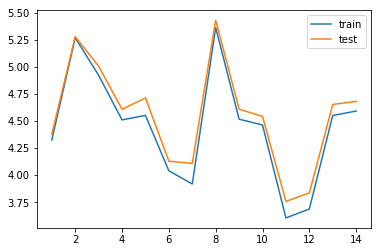

In [22]:
# On cherche les parametres optimaux 
# on fait varier le nombre d'arbre dans la forêt..
curves = []
for n_estimators in range(1,15) :
    

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = n_estimators, max_depth=10 )
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("n_estimators",n_estimators, "erreur",err_train ,err_test)
    curves.append((n_estimators,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde la valeur par défaut n_estimators=10

max_depth 1 erreur 6.64777232307 6.56189738693
max_depth 2 erreur 6.64777232307 6.56189738693
max_depth 3 erreur 6.64167669683 6.5573430415
max_depth 4 erreur 6.55275385158 6.47283438481
max_depth 5 erreur 6.49516470502 6.41442220037
max_depth 6 erreur 6.03161239687 6.02073786479
max_depth 7 erreur 6.09641456191 6.06051769871
max_depth 8 erreur 6.37872424449 6.30293681726
max_depth 9 erreur 4.93012826392 4.99679682728
max_depth 10 erreur 4.65432112199 4.76402927733
max_depth 11 erreur 3.27016059458 3.58583727745
max_depth 12 erreur 3.50477799484 3.84414616652
max_depth 13 erreur 2.10917697482 2.75275110397
max_depth 14 erreur 1.74665320648 2.57398572344
max_depth 15 erreur 1.46847462605 2.51695502777
max_depth 16 erreur 0.964223540332 2.277524941
max_depth 17 erreur 0.969022576554 2.31279400297
max_depth 18 erreur 0.792518885012 2.24873249928
max_depth 19 erreur 0.735332995535 2.2367878835
max_depth 20 erreur 0.700953411227 2.24090289751
max_depth 21 erreur 0.637839667788 2.21708684106

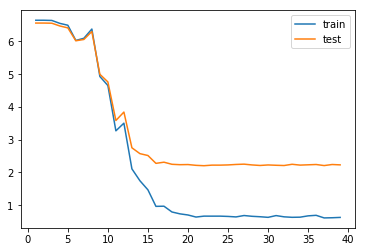

In [23]:
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,40) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=max_depth)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("max_depth",max_depth, "erreur",err_train ,err_test)
    curves.append((max_depth,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 20

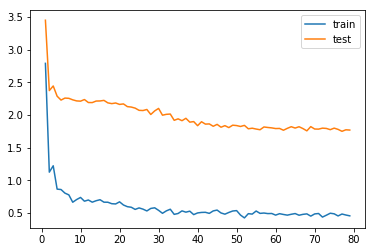

In [27]:
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(1,80) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=max_features)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    #print("max_features",max_features, "erreur",err_train ,err_test)
    curves.append((max_features,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 70

In [17]:
%%time
# Le modèle final est le suivant :

# Etape 1 : définition des paramètres
RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=70)

# Etape 2 : apprentissage
RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

# Etape 3 : prédiction
Y_pred_train = RFC.predict(X_train)
Y_pred_test  = RFC.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)

# R2
R2_train = RFC.score(X_train, Y_train)
R2_test = RFC.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_test)

RMSE_train 0.475596784886
RMSE_test 1.786753084
R2_train 0.980179420334
R2_test 0.664669051878
Wall time: 3.87 s


A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [ ]:
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
parametres = {"max_depth":[15,16,17,18,19,20,21,22,23,24,25],"max_features":[60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]}

#classifieur à utiliser – Random Forest
RFC= RandomForestClassifier()
#instanciation de la recherche
grille = GridSearchCV(estimator=RFC,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train,Y_train["Mortality_cat"].ravel())
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : 
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)
print(R2_train)
print(R2_test)


 {'max_depth': 17, 'max_features': 77}

    RMSE_train 0.544134072891
    RMSE_test 1.75082398184
    R2_train 0.965266063487
    R2_test 0.965266063487
   
les résultats avec cette méthode sont pas stable et moins bons

# Méthode Boosting : ici, nous allons voir l'algorithme de Gradient Boosting Machine (gbm) pour une classification.

# Gradient Bossting Machine Classification

GB construit un modèle additif; il permet l'optimisation de fonctions de pertes différentiables arbitraires. A chaque étape, n_classes_ les arbres de régression sont ajustés sur le gradient négatif de la fonction de perte de déviance binomiale ou multinomiale. La classification binaire est un cas particulier où un seul arbre de régression est induit.

In [16]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate'].describe()
data.sort_values(by=['Mortality_rate'], ascending=False)
data['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
data.groupby(['Mortality_cat'])['Mortality_cat'].count()
print(data.groupby(['Mortality_cat'])['Mortality_rate'].mean())

Mortality_cat
1       0.000000
2       0.104974
3       0.375507
4       0.855722
5       1.958020
6       4.333836
7       8.759500
8      15.763014
9      26.243081
10     41.913380
11     67.882232
12    113.848249
13    206.613198
14    302.866096
15    355.358866
16    434.428403
17    612.906082
18    938.472516
Name: Mortality_rate, dtype: float64


In [17]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})

# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 

# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [33]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Etape 1 : définition des paramètres
GB = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,subsample=1.0)

# Etape 2 : apprentissage
GB = GB.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner 12 min

# Etape 3 : prédiction
Y_pred_train = GB.predict(X_train)
Y_pred_test = GB.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)

# R2
R2_train = GB.score(X_train, Y_train)
R2_test = GB.score(X_test, Y_test)
print(R2_train)
print(R2_test)

1.67401640698
1.79067850744
0.693911976691
0.607602862254


On pourrait certainement trouver de meilleurs résultats en testant d'autres paramètres, mais le temps de traitement est très long juste pour un seul algorithme. Je n'ai pas creusé cette piste.